# Polarizability as a function of detuning (from D1 and D2) for Rb and Cs

Santi

23 January 2026

Here I just want to test that the polarizability data from https://www1.udel.edu/atom/ is being imported correctly.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First Cs

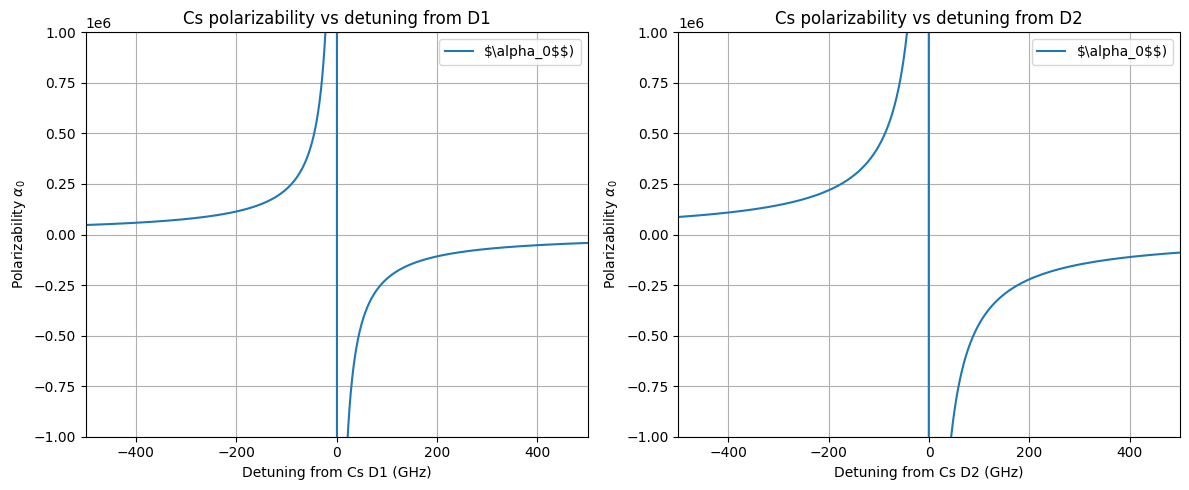

In [4]:
# for Cs
# ---- constants ----
c = 299_792_458.0  # m/s

# Cs D-lines (vacuum) from Steck
lambda_D2_nm = 852.34727582
lambda_D1_nm = 894.59295986

f_D2_Hz = c / (lambda_D2_nm * 1e-9)
f_D1_Hz = c / (lambda_D1_nm * 1e-9)

# ---- load CSV (skip the first metadata row) ----
df = pd.read_csv("Cs1Pol/Cs1_6s.csv", skiprows=1)
df.columns = ["wavelength_nm", "alpha_0", "alpha0_unc", "alpha_2", "alpha2_unc"]

# numeric safety
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["wavelength_nm", "alpha_0"])

# ---- convert wavelength -> frequency and detunings ----
wl_m = df["wavelength_nm"].to_numpy() * 1e-9
f_Hz = c / wl_m

det_D1_GHz = (f_Hz - f_D1_Hz) / 1e9
det_D2_GHz = (f_Hz - f_D2_Hz) / 1e9

alpha = df["alpha_0"].to_numpy()
# alpha0_u_6s = df["alpha0_unc"].to_numpy()
# (optional) sort by detuning so the line plot is not scrambled
i1 = np.argsort(det_D1_GHz)
i2 = np.argsort(det_D2_GHz)

freq_range = 500  # GHz around D1 and D2 lines
ylims = 1e6

# plot both plots above next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(det_D1_GHz[i1], alpha[i1], label=r"$\alpha_0$$)")
ax1.set_xlabel(r"Detuning from Cs D1 (GHz)")
ax1.set_ylabel(r"Polarizability $\alpha_0$")
ax1.set_title("Cs polarizability vs detuning from D1")
ax1.set_xlim([-freq_range, freq_range])
ax1.set_ylim([-ylims, ylims])
ax1.grid(True)
ax1.legend()

ax2.plot(det_D2_GHz[i2], alpha[i2], label=r"$\alpha_0$$)")
ax2.set_xlabel(r"Detuning from Cs D2 (GHz)")
ax2.set_ylabel(r"Polarizability $\alpha_0$")
ax2.set_title("Cs polarizability vs detuning from D2")
ax2.set_xlim([-freq_range, freq_range])
ax2.set_ylim([-ylims, ylims])
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()

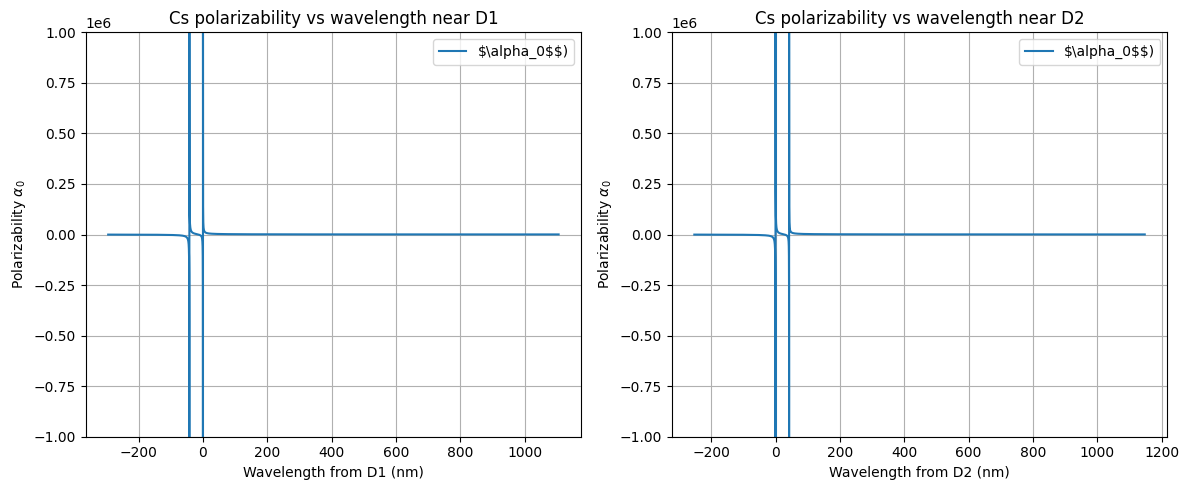

In [6]:
wavelength_range = 500  # nm around D1 and D2 lines
ylims = 1e6

# plot in terms of wavelength form D1 and D2 lines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(df["wavelength_nm"] - lambda_D1_nm, alpha, label=r"$\alpha_0$$)")
ax1.set_xlabel(r"Wavelength from D1 (nm)")
ax1.set_ylabel(r"Polarizability $\alpha_0$")
ax1.set_title("Cs polarizability vs wavelength near D1")
# ax1.set_xlim([-wavelength_range, wavelength_range])
ax1.set_ylim([-ylims, ylims])
ax1.grid(True)
ax1.legend()

ax2.plot(df["wavelength_nm"] - lambda_D2_nm, alpha, label=r"$\alpha_0$$)")
ax2.set_xlabel(r"Wavelength from D2 (nm)")
ax2.set_ylabel(r"Polarizability $\alpha_0$")
ax2.set_title("Cs polarizability vs wavelength near D2")
# ax2.set_xlim([-wavelength_range, wavelength_range])
ax2.set_ylim([-ylims, ylims])
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()

Now Rb

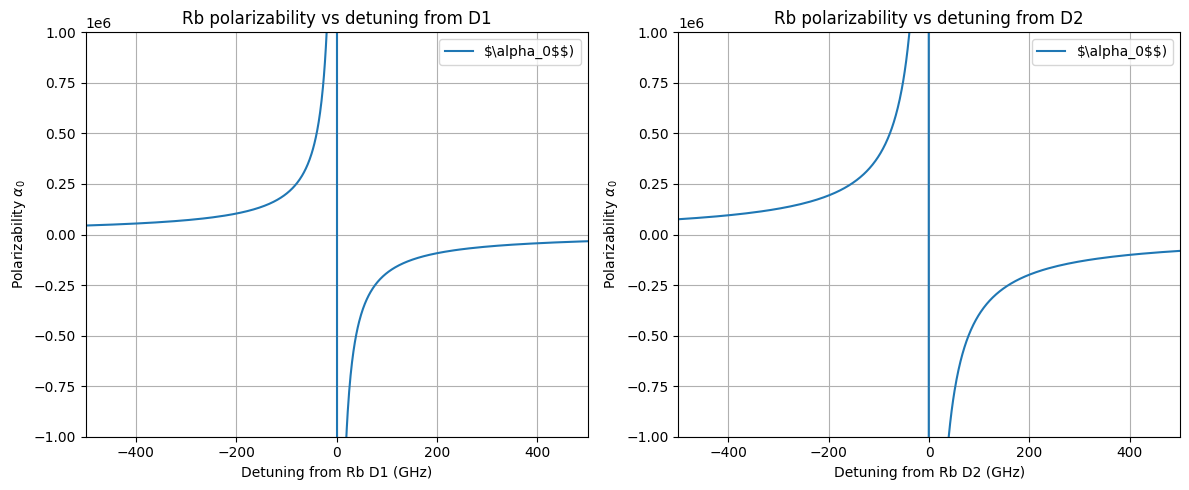

In [54]:
# for Rb
# ---- constants ----
c = 299_792_458.0  # m/s

# Cs D-lines (vacuum) from Steck
lambda_D2_nm = 780.241209686
lambda_D1_nm = 794.978851156

f_D2_Hz = c / (lambda_D2_nm * 1e-9)
f_D1_Hz = c / (lambda_D1_nm *  1e-9)

# ---- load CSV (skip the first metadata row) ----
df = pd.read_csv("Rb1Pol/Rb1_5s.csv", skiprows=1)
df.columns = ["wavelength_nm", "alpha_0", "alpha0_unc", "alpha_2", "alpha2_unc"]

# numeric safety
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["wavelength_nm", "alpha_0"])

# ---- convert wavelength -> frequency and detunings ----
wl_m = df["wavelength_nm"].to_numpy() * 1e-9
f_Hz = c / wl_m

det_D1_GHz = (f_Hz - f_D1_Hz) / 1e9
det_D2_GHz = (f_Hz - f_D2_Hz) / 1e9

alpha = df["alpha_0"].to_numpy()
# alpha0_u_6s = df["alpha0_unc"].to_numpy()
# (optional) sort by detuning so the line plot is not scrambled
i1 = np.argsort(det_D1_GHz)
i2 = np.argsort(det_D2_GHz)

wavelength_range = 500  # nm around D1 and D2 lines
ylims = 1e6

# plot both plots above next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(det_D1_GHz[i1], alpha[i1], label=r"$\alpha_0$$)")
ax1.set_xlabel(r"Detuning from Rb D1 (GHz)")
ax1.set_ylabel(r"Polarizability $\alpha_0$")
ax1.set_title("Rb polarizability vs detuning from D1")
ax1.set_xlim([-wavelength_range, wavelength_range])
ax1.set_ylim([-ylims, ylims])
ax1.grid(True)
ax1.legend()

ax2.plot(det_D2_GHz[i2], alpha[i2], label=r"$\alpha_0$$)")
ax2.set_xlabel(r"Detuning from Rb D2 (GHz)")
ax2.set_ylabel(r"Polarizability $\alpha_0$")
ax2.set_title("Rb polarizability vs detuning from D2")
ax2.set_xlim([-wavelength_range, wavelength_range])
ax2.set_ylim([-ylims, ylims])
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()

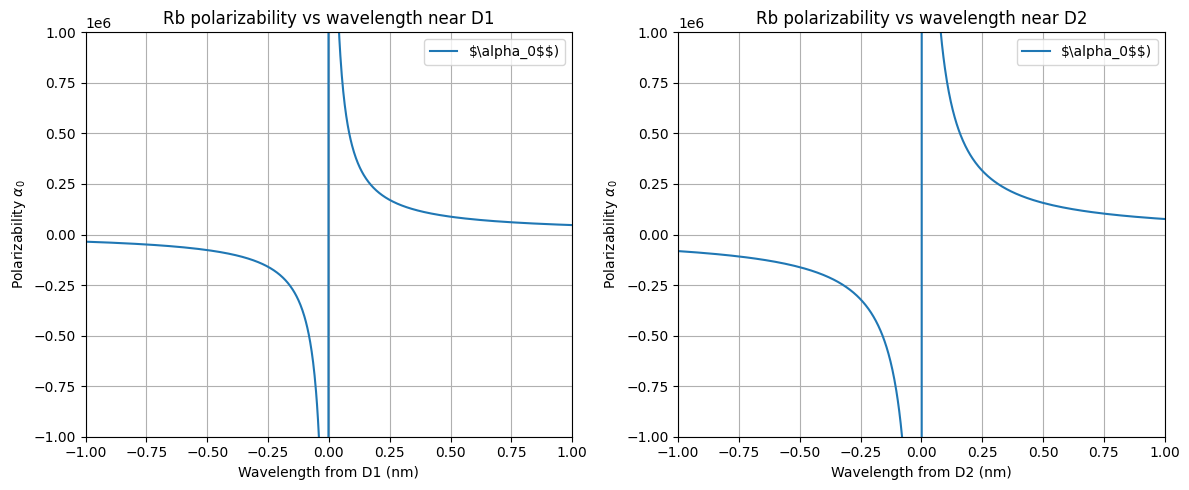

In [55]:
wavelength_range = 1  # nm around D1 and D2 lines
ylims = 1e6

# plot in terms of wavelength form D1 and D2 lines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(df["wavelength_nm"] - lambda_D1_nm, alpha, label=r"$\alpha_0$$)")
ax1.set_xlabel(r"Wavelength from D1 (nm)")
ax1.set_ylabel(r"Polarizability $\alpha_0$")
ax1.set_title("Rb polarizability vs wavelength near D1")
ax1.set_xlim([-wavelength_range, wavelength_range])
ax1.set_ylim([-ylims, ylims])
ax1.grid(True)
ax1.legend()

ax2.plot(df["wavelength_nm"] - lambda_D2_nm, alpha, label=r"$\alpha_0$$)")
ax2.set_xlabel(r"Wavelength from D2 (nm)")
ax2.set_ylabel(r"Polarizability $\alpha_0$")
ax2.set_title("Rb polarizability vs wavelength near D2")
ax2.set_xlim([-wavelength_range, wavelength_range])
ax2.set_ylim([-ylims, ylims])
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()